<a href="https://colab.research.google.com/github/hoangnuthuphuong/Machine_Learning/blob/main/Chuong1_NhapMonHocMay/B%C3%A0i_t%E1%BA%ADp_x%C3%A2y_d%E1%BB%B1ng_vector_%C4%91%E1%BA%B7c_tr%C6%B0ng_cho_v%C4%83n_b%E1%BA%A3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> Sử dụng phương pháp tf-idf

> Sử dụng tập dữ liệu đính kèm để xây dựng vector đặc trưng cho các văn bản (tiếng Anh/tiếng Việt) theo phương pháp tf-idf.

NOTE: lập trình bằng python, không sử dụng phương tiện tính toán tf-idf khác

In [ ]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=ff307f2459d31761b12e31a57e34db9323ee392760ae78f1258e5cdbc15471ef
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
pd.set_option("max_rows", 600)
from pathlib import Path  
import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
a='/content/vb01.txt'
b='/content/vb02.txt'

In [ ]:
bagOfWordsA = a.split(' ')
bagOfWordsB = b.split(' ')

In [ ]:
uniqueWords = set(bagOfWordsA).union(set(bagOfWordsB))

In [ ]:
numOfWordsA = dict.fromkeys(uniqueWords, 0)
for word in bagOfWordsA:
    numOfWordsA[word] += 1
numOfWordsB = dict.fromkeys(uniqueWords, 0)
for word in bagOfWordsB:
    numOfWordsB[word] += 1

In natural language processing, useless words are referred to as stop words. The python natural language toolkit library provides a list of english stop words.

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


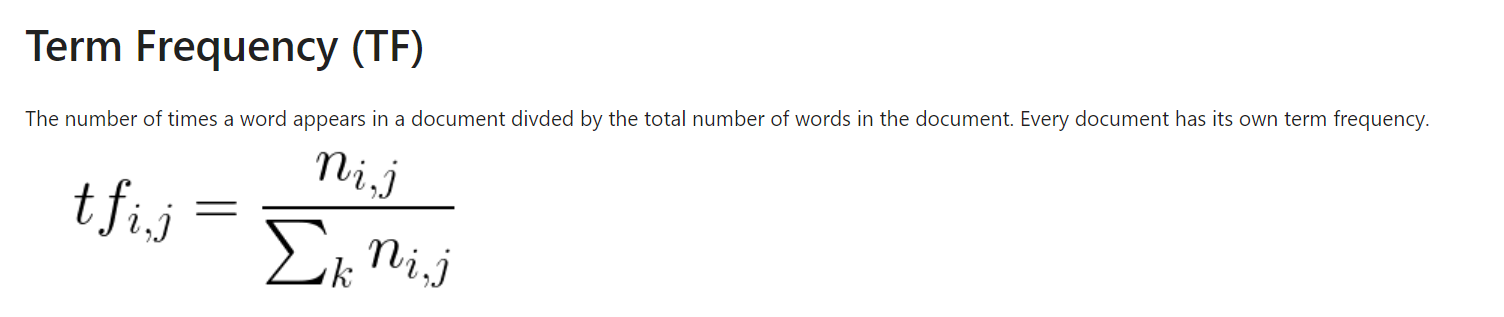

In [ ]:
def computeTF(wordDict, bagOfWords):
    tfDict = {}
    bagOfWordsCount = len(bagOfWords)
    for word, count in wordDict.items():
        tfDict[word] = count / float(bagOfWordsCount)
    return tfDict

In [ ]:
tfA = computeTF(numOfWordsA, bagOfWordsA)
tfB = computeTF(numOfWordsB, bagOfWordsB)

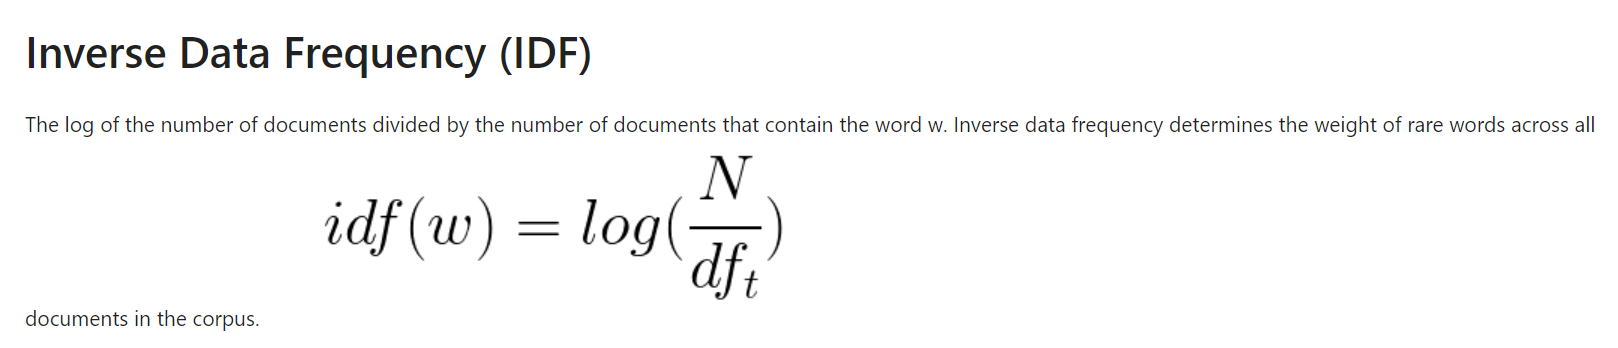

In [ ]:
def computeIDF(documents):
    import math
    N = len(documents)
    
    idfDict = dict.fromkeys(documents[0].keys(), 0)
    for document in documents:
        for word, val in document.items():
            if val > 0:
                idfDict[word] += 1
    
    for word, val in idfDict.items():
        idfDict[word] = math.log(N / float(val))
    return idfDict

In [ ]:
idfs = computeIDF([numOfWordsA, numOfWordsB])

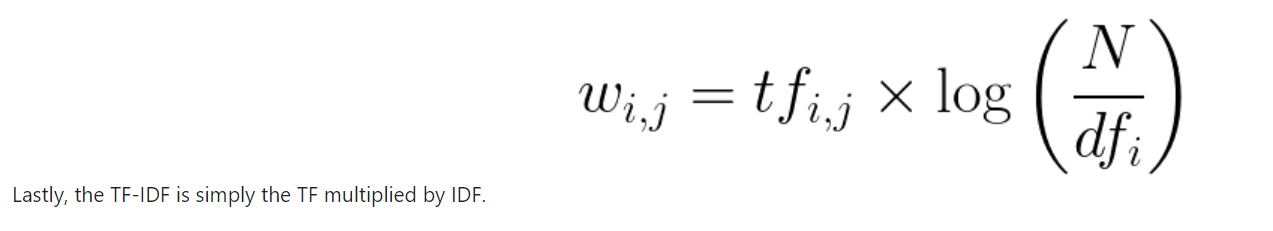

In [ ]:
def computeTFIDF(tfBagOfWords, idfs):
    tfidf = {}
    for word, val in tfBagOfWords.items():
        tfidf[word] = val * idfs[word]
    return tfidf

In [ ]:
tfidfA = computeTFIDF(tfA, idfs)
tfidfB = computeTFIDF(tfB, idfs)
df = pd.DataFrame([tfidfA, tfidfB])

In [ ]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform([a,b])
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
